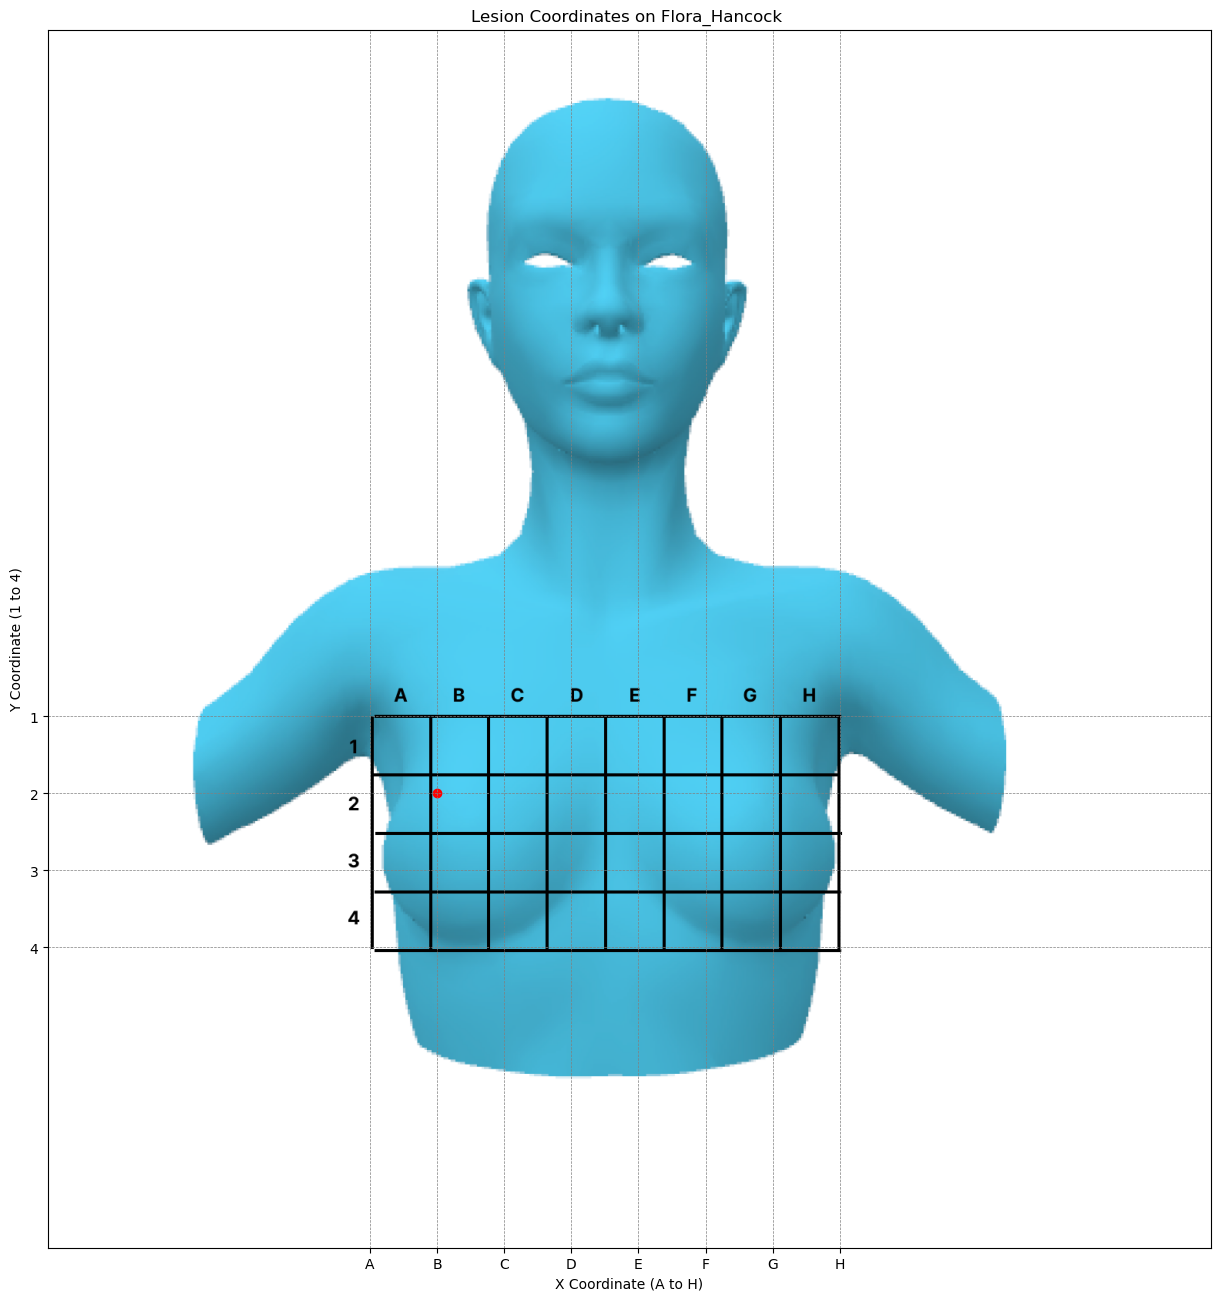

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the CSV file
df = pd.read_csv('Flora_Hancock_Benign.csv')

# Ensure the CSV contains the specified 'x column' and 'y column' columns
if 'x' not in df.columns or 'y' not in df.columns:
    raise ValueError("CSV file must contain 'x' and 'y' columns")

# Mapping of box coordinates
x_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
y_labels = ['4', '3', '2', '1']

# Convert x and y coordinates to numerical values for plotting
df['x_num'] = df['x'].apply(lambda x: x_labels.index(x))
df['y_num'] = df['y'].apply(lambda y: y_labels.index(str(y)))

# Load the background image
img = Image.open('coordinates.png')

# Get image dimensions
img_width, img_height = img.size

# Define the bounding box for the graph (in pixels)
# Adjust these coordinates to place the graph in the desired area of the image
bbox_left = 418
bbox_right = 1028
bbox_bottom = 390
bbox_top = 690

# Create a figure with appropriate size
fig, ax = plt.subplots(figsize=(15.1, 15.82))

# Display the image
ax.imshow(img, extent=[0, img_width, 0, img_height])

# Calculate the extent for the graph based on the bounding box
x_extent = [bbox_left, bbox_right]
y_extent = [bbox_bottom, bbox_top]

# Overlay the coordinates on the image within the bounding box
ax.scatter(
    np.interp(df['x_num'], [0, len(x_labels) - 1], x_extent),
    np.interp(df['y_num'], [0, len(y_labels) - 1], y_extent),
    c='red', marker='o'
)

# Set the x and y axis limits to match the image dimensions
ax.set_xlim(0, img_width)
ax.set_ylim(0, img_height)

# Set the x and y axis ticks within the bounding box
ax.set_xticks(np.linspace(bbox_left, bbox_right, len(x_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticks(np.linspace(bbox_bottom, bbox_top, len(y_labels)))
ax.set_yticklabels(y_labels)

# Add grid within the bounding box
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='gray')

# Add title and labels
ax.set_title('Lesion Coordinates on Flora_Hancock ')
ax.set_xlabel('X Coordinate (A to H)')
ax.set_ylabel('Y Coordinate (1 to 4)')

# Save the plot as a PNG image
plt.savefig('Flora_Hancock_Benign.png', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()
